In [1]:
#importing stuff I will need 

import numpy as np 
import matplotlib.pyplot as plt 
import sys
sys.setrecursionlimit(10000)
from scipy import integrate

In [53]:
#deciding some stuff and defining some constants 

#stuff I decide 
R = 5.0
z = np.linspace(0,10,101)

b0 = -1
b1 = 1

#setting up the integral that I took from Griffiths, 
#All the prefactor terms are 1 for the purposes of this problem 
def e_sphere(x,z):
    numerator = z - R*x
    denominator = (R**2 + z**2 - 2*R*z*x)**(3/2)
    prefactor = (R**2)/2
    return prefactor*numerator/denominator


In [46]:
# The simpsons function from class wasn't working on my function, and I couldn't figure out why
# I found this one online and it worked perfectly, so I decided to keep it 

def adaptive_simpson( f, a, b, tol ):


    # Theory says the factor to multiply the tolerance by should be 15, but
    # since that assumes that the fourth derivative of f is fairly constant,
    # we want to be a bit more conservative...

    tol_factor = 10.0

    h = 0.5 * ( b - a )

    x0 = a
    x1 = a + 0.5 * h
    x2 = a + h
    x3 = a + 1.5 * h
    x4 = b

    f0 = f( x0 )
    f1 = f( x1 )
    f2 = f( x2 )
    f3 = f( x3 )
    f4 = f( x4 )

    s0 = h * ( f0 + 4.0 * f2 + f4 ) / 3.0
    s1 = h * ( f0 + 4.0 * f1 + 2.0 * f2 + 4.0 * f3 + f4 ) / 6.0

    if abs( s0 - s1 ) >= tol_factor * tol:
        s = adaptive_simpson( f, x0, x2, 0.5 * tol ) + \
            adaptive_simpson( f, x2, x4, 0.5 * tol )
    else:
        s = s1 + ( s1 - s0 ) / 15.0
    return s

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


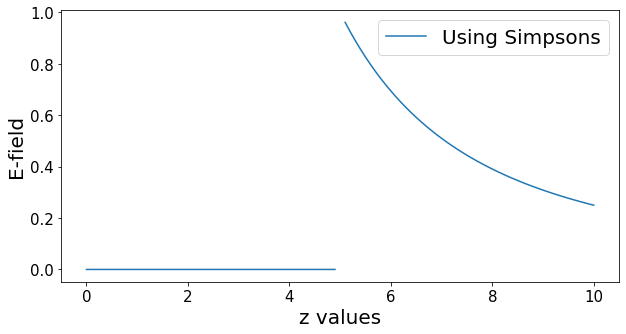

In [68]:
#Using my own adaptive integral 
ans = []
for v in z:
    f = lambda x : e_sphere(x,v)
    val = adaptive_simpson(f,b0,b1,1e-7)
    ans.append(val)


fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(z,ans,label='Using Simpsons')
ax1.set_xlabel('z values',fontsize=20)
ax1.set_ylabel('E-field',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.legend(fontsize=20)

#It clearly gets bothered when it tries to evaluate the E-field at the radius, I could set 
#up a condition in my for loop above to get it to skip over R, if you wanted to get rid of the 
#warning if you wanted ... 

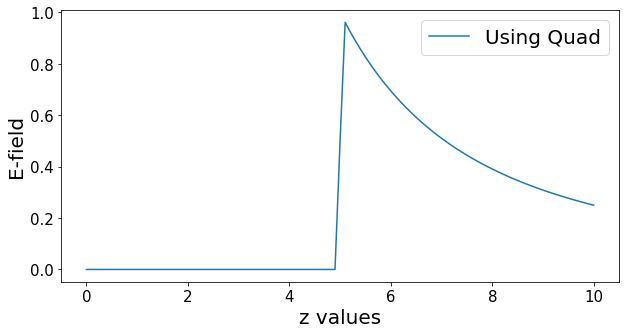

In [69]:
#using scipy.integrate.quad

ans_scipy = []
for v in z:
    f = lambda x : e_sphere(x,v)
    ans_scipy.append(integrate.quad(f,b0,b1)[0])

fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(z,ans_scipy,label='Using Quad')
ax1.set_xlabel('z values',fontsize=20)
ax1.set_ylabel('E-field',fontsize=20)
ax1.tick_params(labelsize=15)
ax1.legend(fontsize=20)

#this one looks amazing and doesn't have any issues with the radius value, I guess it's more robust 